# Day 9

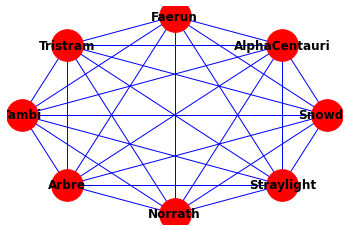

In [39]:
d9i = open("D9i.txt","r")
lines = d9i.read().splitlines()
d9i.close()

import re
import networkx as nx
import matplotlib.pyplot as plt

lines = [re.split(r' to | = ',x) for x in lines]

travelMap = nx.Graph()

cities = set(line[0] for line in lines)

travelMap.add_nodes_from(cities)

for line in lines:
    travelMap.add_edge(line[0],line[1],weight=int(line[2]))

plt.subplot()
options = {
    'node_color': 'red',
    'edge_color': 'blue',
    'node_size': 1000,
    'width': 1,
    'with_labels':True,
    'font_weight':'bold'
}
nx.draw_circular(travelMap,**options)#with_labels=True,font_weight='bold')



# Day 7 (incomplete)

In [2]:
## Day 7 ## Attempt 2

d7i = open("D7i.txt","r")
lines = d7i.read().splitlines()
d7i.close()

lines.sort(key=len)


In [ ]:
## Day 7 ## Attempt 1 --- This made my computer freak out

d7i = open("D7i.txt","r")
lines = d7i.read().splitlines()
d7i.close()

signals = {}
conn = []

lines = ['123 -> x','456 -> y','x AND y -> d','x OR y -> e','x LSHIFT 2 -> f','y RSHIFT 2 -> g','NOT x -> h','NOT y -> i']

for i in lines:
    instr = i.split()
    instr.pop(-2)
    conn.append(instr)
    
for i in conn:
    signals[i[-1]] = None

while len(conn) > 0:
    for c in range(len(conn)-2):
        if conn[c][0] == 'NOT':
            if signals[conn[c][1]] == None:
                continue
            else:
                signals[conn[c][-1]] = ~signals[conn[c][1]]
                conn.pop(c)
                break
        elif conn[c][1] == 'LSHIFT':
            if signals[conn[c][0]] == None:
                continue
            else:
                signals[conn[c][-1]] = signals[conn[c][0]] << int(conn[c][2])
                conn.pop(c)
                break
        elif conn[c][1] == 'RSHIFT':
            if signals[conn[c][0]] == None:
                continue
            else:
                signals[conn[c][-1]] = signals[conn[c][0]] >> int(conn[c][2])
                conn.pop(c)
                break
        elif conn[c][1] == 'OR':
            if signals[conn[c][0]] or signals[conn[c][2]] == None:
                continue
            else:
                a = signals[conn[c][0]] if conn[c][0] in signals.keys() else int(conn[c][0])
                b = signals[conn[c][2]] if conn[c][2] in signals.keys() else int(conn[c][2])
                signals[conn[c][-1]] = a | b
                conn.pop(c)
                break
        elif conn[c][1] == 'AND':
            if signals[conn[c][0]] or signals[conn[c][2]] == None:
                continue
            else:
                a = signals[conn[c][0]] if conn[c][0] in signals.keys() else int(conn[c][0])
                b = signals[conn[c][2]] if conn[c][2] in signals.keys() else int(conn[c][2])
                signals[conn[c][-1]] = a & b
                conn.pop(c)
                break
        else:
            if conn[c][0] in signals.keys() and signals[conn[c][0]] == None:
                continue
            else:
                signals[conn[c][-1]] = signals[conn[c][0]] if conn[c][0] in signals.keys() else int(conn[c][0])
                conn.pop(c)

display(signals)
display(conn)

# Day 6

In [10]:
## Day 6 ##

import numpy

d6i = open("D6i.txt","r")
lines = d6i.read().splitlines()
d6i.close()

instructions = []

for line in lines:
    instruction = line.split()[-4:]
    instruction.pop(2)
    instruction[1] = [int(x) for x in instruction[1].split(',')]
    instruction[2] = [int(x) for x in instruction[2].split(',')]
    instructions.append(instruction)

    
lights = numpy.zeros((1000,1000))

for instruction in instructions:
    comm = instruction[0]
    begin = instruction[1]
    end = instruction[2]
    
    if comm == 'on':
        for i in range(begin[0],end[0]+1):
            for j in range(begin[1],end[1]+1):
                lights[i][j] = 1
    elif comm == 'off':
        for i in range(begin[0],end[0]+1):
            for j in range(begin[1],end[1]+1):
                lights[i][j] = 0
    elif comm == 'toggle':
        for i in range(begin[0],end[0]+1):
            for j in range(begin[1],end[1]+1):
                lights[i][j] = int(lights[i][j]) ^ 1

print('Part 1:')
print(int(numpy.sum(lights)))

lights = numpy.zeros((1000,1000))

for instruction in instructions:
    comm = instruction[0]
    begin = instruction[1]
    end = instruction[2]
    
    if comm == 'on':
        for i in range(begin[0],end[0]+1):
            for j in range(begin[1],end[1]+1):
                lights[i][j] += 1
    elif comm == 'off':
        for i in range(begin[0],end[0]+1):
            for j in range(begin[1],end[1]+1):
                if lights[i][j] != 0:
                    lights[i][j] -= 1
    elif comm == 'toggle':
        for i in range(begin[0],end[0]+1):
            for j in range(begin[1],end[1]+1):
                lights[i][j] += 2
        
print('\nPart 2:')
print(int(numpy.sum(lights)))

Part 1:
543903

Part 2:
14687245


# Day 5

In [35]:
## Day 5 ##

d5i = open("D5i.txt","r")
lines = d5i.read().splitlines()
d5i.close()


# Part 1 
forbidden = ['ab','cd','pq','xy']
doubles = ['aa','bb','cc','dd','ee','ff','gg','hh','ii','jj','kk','ll','mm','nn','oo','pp','qq','rr','ss','tt','uu','vv','ww','xx','yy','zz']
vowels = 'aeiou'

i = 0
for line in lines:
    if not(any(x in line for x in forbidden)) and any(x in line for x in doubles):
        vcount = 0
        for vowel in vowels:
            vcount += line.count(vowel)
        if vcount > 2:
            i += 1

print('Nice strings in part 1: '+str(i))

# Part 2

i = 0
for line in lines:
    cond1 = False
    cond2 = False
    for j in range(len(line)-1):
        if j<len(line)-2 and line[j] == line[j+2]:
            cond1 = True
        linel = line[:j]
        liner = line[j+2:]
        dub = line[j]+line[j+1]
        if (dub in linel) or (dub in liner):
            cond2 = True
    if cond1 and cond2:
        i += 1


print('Nice strings in part 2: '+str(i))

Nice strings in part 1: 258
Nice strings in part 2: 53


# Day 4

In [1]:
## Day 4 ##
import hashlib
input = 'iwrupvqb'

i = 1;
hash = hashlib.md5(input.encode()).hexdigest()


while hash[0:5] != '00000' :
    i += 1
    inputmod = input + str(i)
    hash = hashlib.md5(inputmod.encode()).hexdigest()

print('5 zeros')
print('Input: '+inputmod)
print('Hash: '+str(hash))
print('Seed: '+str(i))

while hash[0:6] != '000000' :
    i += 1
    inputmod = input + str(i)
    hash = hashlib.md5(inputmod.encode()).hexdigest()

print('\n6 zeros')
print('Input: '+inputmod)
print('Hash: '+str(hash))
print('Seed: '+str(i))

5 zeros
Input: iwrupvqb346386
Hash: 0000045c5e2b3911eb937d9d8c574f09
Seed: 346386

6 zeros
Input: iwrupvqb9958218
Hash: 00000094434e1914548b3a1af245fb27
Seed: 9958218


# Day 3

In [6]:
## DAY 3 ##

d3i = open("D3i.txt","r")
instr = d3i.read()
d3i.close()

i = 0
j = 0
k = 0
l = 0
count = 0


houses = [str(i)+','+str(j)]
houses.append(str(k)+','+str(l))

for dir in instr:
    if count%2 == 0:
        if dir == '<':
            i -= 1
        elif dir == '>':
            i += 1
        elif dir == '^':
            j += 1
        elif dir == 'v':
            j -=1
        houses.append(str(i)+','+str(j))
    else:
        if dir == '<':
            k -= 1
        elif dir == '>':
            k += 1
        elif dir == '^':
            l += 1
        elif dir == 'v':
            l -=1
        houses.append(str(k)+','+str(l))
    count += 1
    
uhouse = list(set(houses))
display(len(uhouse))

2341

# Day 2

In [24]:
## DAY 2 ##

d2i = open("D2i.txt","r")
lines = d2i.read().splitlines()
d2i.close()

area = 0
bow = 0

for pack in lines:
    dim = [int(i) for i in pack.split('x')]
    area += 2*dim[0]*dim[1]+2*dim[1]*dim[2]+2*dim[0]*dim[2] + min(dim[0]*dim[1],dim[0]*dim[2],dim[1]*dim[2])
    bow += min(2*(dim[0]+dim[1]),2*(dim[1]+dim[2]),2*(dim[0]+dim[2])) + dim[1]*dim[2]*dim[0]
    
display(area)
display(bow)

1588178

3783758

# Day 1

In [13]:
## DAY 1 ##

d1i = open("D1i.txt","r")
instr = d1i.read ()
d1i.close()

floor = 0;
ind = 1;
notshown = True

for i in instr:
    if i == '(':
        floor += 1
    elif i == ')':
        floor -= 1
    if floor < 0 and notshown:
        display(ind)
        notshown = False
    ind +=1
    
display(floor)

1795

74